# Flot  par Ford-Fulkerson Algorithm (FFA)


In [112]:
g = DiGraph()

In [113]:
g.add_vertices(range(6))

In [114]:
g.add_edges([(0,1,1),(0,2,4),(2,1,2),(1,3,4),(4,2,3),(3,4,2),(3,5,1),(4,5,5)])

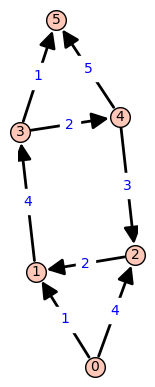

In [115]:
g.show(edge_labels=True)

In [116]:
[_,g_flow] = g.flow(0,5,value_only=False,use_edge_labels=True)

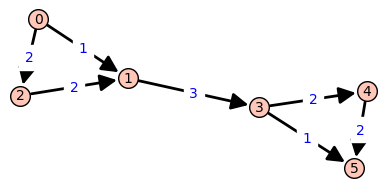

In [117]:
g_flow.show(edge_labels=True)

#  Flot résolu par programation linéaire

In [119]:
p = MixedIntegerLinearProgram()
f = p.new_variable(nonnegative=True)
s,t = 0,5
for v in g:
    if v in {s,t}:
        continue
    p.add_constraint(
        p.sum(f[v,u] for u in g.neighbors_out(v)) ==
        p.sum(f[u,v] for u in g.neighbors_in(v))
    )
    
for e in g.edges():
    u,v,l = e
    p.add_constraint(f[u,v] <= l)
    
p.set_objective(p.sum(f[u,t] for u in g.neighbors_in(t)))
        

In [120]:
p.solve()

3.0

In [129]:
sol = p.get_values(f)

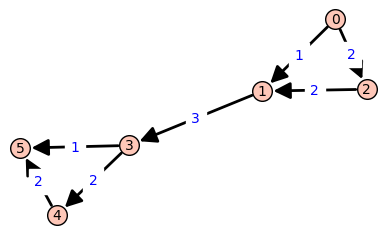

In [128]:
gg = DiGraph()
gg.add_vertices([0,1,2,3,4,5])
for e in sol:
    u,v = e
    l = int(sol[e])
    if l> 0:
        gg.add_edge((u,v,l))
gg.show(edge_labels=True)

# Autre exemple

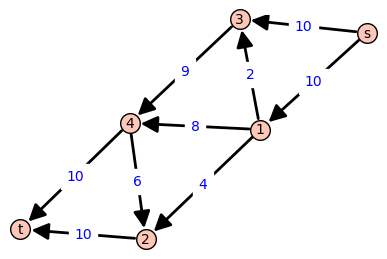

In [133]:
g = DiGraph()
g.add_vertices(['s',1,2,3,4,'t'])
g.add_edges([('s',1,10),('s',3,10),(1,3,2),(1,4,8),(3,4,9),(1,2,4),(4,2,6),(2,'t',10),(4,'t',10)])
g.show(edge_labels=True)

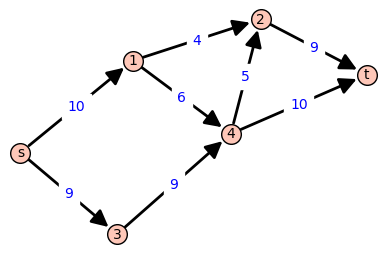

In [134]:
[g_val,g_flow] = g.flow('s','t',value_only=False,use_edge_labels=True)
g_flow.show(edge_labels=True)

In [135]:
g_val

19

In [136]:
p = MixedIntegerLinearProgram()
f = p.new_variable(nonnegative=True)
s,t = 's','t'
for v in g:
    if v in {s,t}:
        continue
    p.add_constraint(
        p.sum(f[v,u] for u in g.neighbors_out(v)) ==
        p.sum(f[u,v] for u in g.neighbors_in(v))
    )
    
for e in g.edges():
    u,v,l = e
    p.add_constraint(f[u,v] <= l)
    
p.set_objective(p.sum(f[u,t] for u in g.neighbors_in(t)))
        

In [137]:
p.solve()

19.0

In [138]:
sol = p.get_values(f)

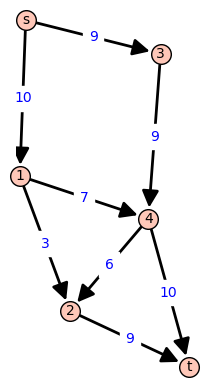

In [139]:
gg = DiGraph()
gg.add_vertices(['s',1,2,3,4,'t'])
for e in sol:
    u,v = e
    l = int(sol[e])
    if l> 0:
        gg.add_edge((u,v,l))
gg.show(edge_labels=True)